In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import string

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Packages for checking assumptions
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix
from matplotlib import rcParams

rcParams['figure.figsize'] = 11,11


# Loading Data

In [2]:
#load the data:
path = './'
filename = 'DATA.csv'

try:
    data_heart = pd.read_csv(path+filename,sep="\t")
    data_heart = data_heart.drop(['Unnamed: 0'], axis=1)
    print("File Loaded Succesfully ")
except:
    print("File Not Found !!")
    
data_heart.head()

File Loaded Succesfully 


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


In [3]:
y = data_heart['target'] 
include_col = ['cp','thalach','oldpeak','ca','thal']

X = data_heart[[i for i in data_heart.columns.values.tolist() if i in include_col]]
print (X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(303, 5) (303,)
(212, 5) (212,)
(91, 5) (91,)


In [4]:
## Scikit learn and Statsmodel packages
from sklearn.linear_model import LogisticRegression, LinearRegression
import statsmodels.api as sm

In [5]:
'''Use scikit learn'''
r_d_logistic = LogisticRegression()
r_d_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
## Set up the regression
logit = sm.Logit(y_train, X_train)
logit_result = logit.fit()
## lets get the results
print (logit_result.summary())

Optimization terminated successfully.
         Current function value: 0.400082
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                  212
Model:                          Logit   Df Residuals:                      207
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Nov 2018   Pseudo R-squ.:                  0.4105
Time:                        19:11:08   Log-Likelihood:                -84.817
converged:                       True   LL-Null:                       -143.88
                                        LLR p-value:                 1.349e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
cp            -0.8850      0.200     -4.424      0.000      -1.277      -0.493
thalach       -0.0177      0.

In [7]:
predictions = logit_result.predict(X_test)
predictions_nominal = [ 0 if x < 0.5 else 1 for x in predictions]
print (predictions[:10])

246    0.952732
183    0.638440
229    0.429923
126    0.292309
184    0.899259
1      0.336534
59     0.410251
194    0.373433
132    0.100973
175    0.875528
dtype: float64


In [8]:
print (classification_report(y_test, predictions_nominal, digits=3))

             precision    recall  f1-score   support

          0      0.725     0.902     0.804        41
          1      0.900     0.720     0.800        50

avg / total      0.821     0.802     0.802        91



# Random Forest Classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
y = data_heart['target'] 
exclude_col = ['target']

X = data_heart[[i for i in data_heart.columns.values.tolist() if i not in exclude_col]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [19]:
# Train: Random Forest
random_forest = RandomForestClassifier(n_estimators=10, random_state = 0)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_val = round(random_forest.score(X_test, y_test) * 100, 2)

print("acc train: " + str(acc_train))
print("acc test: "+ str(acc_val))

acc train: 99.59
acc test: 80.33


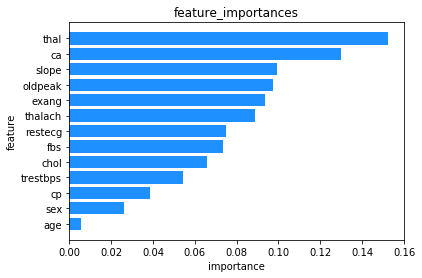

In [20]:
feature_importance = random_forest.feature_importances_
feat_importances = pd.Series(random_forest.feature_importances_, index= data_heart.columns[:-1])
feat_importances = feat_importances.nlargest(13)

feature = data_heart.columns.values.tolist()[0:-1]
importance = sorted(random_forest.feature_importances_.tolist())


x_pos = [i for i, _ in enumerate(feature)]

plt.barh(x_pos, importance , color='dodgerblue')
plt.ylabel("feature")
plt.xlabel("importance")
plt.title("feature_importances")

plt.yticks(x_pos, feature)

plt.show()

# Using Neural Networks

In [39]:
y = data_heart['target'] 
exclude_col = ['target']

X = data_heart[[i for i in data_heart.columns.values.tolist() if i not in exclude_col]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2


In [42]:
### NUERAL NETWORK
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(42)

#hyperparameters
# h1 = 6
# h2 = 4 
# lr = 0.0023
# num_epoch =7000

h1 = 6
h2 = 4
lr = 0.0001
num_epoch = 1700

#build model
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(13, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, 2)
    

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        #return  F.log_softmax(x, dim=1)
        return x
    
    
net = Net()

#choose optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(net.parameters(), lr=lr, momentum=0.7)

loss_per_epoch = []

#train
for epoch in range(num_epoch):
    X = Variable(torch.Tensor(X_train.values).float())
    Y = Variable(torch.Tensor(y_train.values).long())

    #feedforward - backprop
    optimizer.zero_grad()
    
    out = net(X)
    loss = criterion(out, Y)
    loss.backward()
    optimizer.step()

    if (epoch) % 100 == 0:
        #get test accuracy
        X = Variable(torch.Tensor(X_test.values).float())
        Y = torch.Tensor(y_test.values).long()
        out = net(X)
        _, predicted = torch.max(out.data, 1)


        #get training accuracy 
        Xt = Variable(torch.Tensor(X_train.values).float())
        Yt = torch.Tensor(y_train.values).long()
        out = net(Xt)
        _, predicted_train = torch.max(out.data, 1)

        #print accuration
        testacc = (100 * torch.sum(Y==predicted) / len(y_test))
        trainacc = (100 * torch.sum(Yt==predicted_train) / len(y_train))
        print('Epoch: ',epoch,' Test Acc : ', testacc ,' Training Acc :' ,trainacc)
#         print ('Epoch [%d/%d] Loss: %.4f' 
#                    %(epoch+1, num_epoch, loss.data[0]))
    loss_per_epoch.append(loss.item()) 

Epoch:  0  Test Acc :  tensor(57)  Training Acc : tensor(42)
Epoch:  100  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  200  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  300  Test Acc :  tensor(42)  Training Acc : tensor(57)
Epoch:  400  Test Acc :  tensor(67)  Training Acc : tensor(70)
Epoch:  500  Test Acc :  tensor(73)  Training Acc : tensor(72)
Epoch:  600  Test Acc :  tensor(72)  Training Acc : tensor(72)
Epoch:  700  Test Acc :  tensor(70)  Training Acc : tensor(71)
Epoch:  800  Test Acc :  tensor(70)  Training Acc : tensor(71)
Epoch:  900  Test Acc :  tensor(72)  Training Acc : tensor(73)
Epoch:  1000  Test Acc :  tensor(72)  Training Acc : tensor(75)
Epoch:  1100  Test Acc :  tensor(72)  Training Acc : tensor(78)
Epoch:  1200  Test Acc :  tensor(73)  Training Acc : tensor(80)
Epoch:  1300  Test Acc :  tensor(77)  Training Acc : tensor(84)
Epoch:  1400  Test Acc :  tensor(77)  Training Acc : tensor(84)
Epoch:  1500  Test Acc :  tensor(78)  Training Acc :

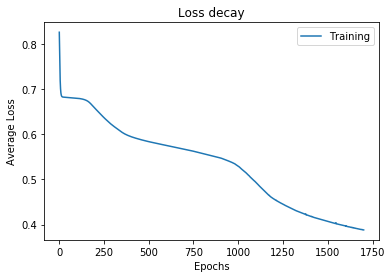

Accuracy of the Test 80 %
Accuracy of the Training 86 %


In [43]:
epochs = np.arange(1,num_epoch + 1)
plt.plot(epochs, loss_per_epoch, label='Training')
plt.ylabel('Average Loss')
plt.xlabel('Epochs')
plt.title('Loss decay')
plt.legend()
plt.show()       

xtest = X_test
ytest = y_test

#get prediction
X = Variable(torch.Tensor(xtest.values).float())
Y = torch.Tensor(ytest.values).long()
out = net(X)
_, predicted = torch.max(out.data, 1)


#get prediction train
Xt = Variable(torch.Tensor(X_train.values).float())
Yt = torch.Tensor(y_train.values).long()
out = net(Xt)
_, predicted_train = torch.max(out.data, 1)

#get accuration
print('Accuracy of the Test %d %%' % (100 * torch.sum(Y==predicted) / len(y_test)))
print('Accuracy of the Training %d %%' % (100 * torch.sum(Yt==predicted_train) / len(y_train)))